# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [3]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16CE02' in k[:6]}
    
for (k,v) in data.items():
    print(k,v['cgpa'][1])
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16CE02020 6.74
16CE02019 7.00
16CE02018 8.68
16CE02017 7.26
16CE02016 8.28
16CE02015 7.47
16CE02014 7.60
16CE02013 8.60
16CE02011 7.21
16CE02010 7.83
16CE02001 7.91
16CE02002 7.68
16CE02005 8.19
16CE02006 8.15
16CE02007 7.91
16CE02009 8.26
Total Stuents: 16


## Date of Birth analysis

In [4]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:    April 27, 1998
  Median:      May 26, 1998
  Oldest:    March 23, 1996
Youngest: December 12, 1999


## Branch Change Analysis

In [12]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 20 and v['cgpa'][2] !='WH')]
cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass

no branch changer


## Course wise analysis

In [10]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,HS2L002,Speaking and Presentation,4,3,0,0,0,1,1,1,0,0,0,6.00,6.0
1,ME1L001,Mechanics,4,16,0,0,3,5,5,3,0,0,0,6.50,6.5
2,MA2L003,Probability Statistics and Stochastic Processes,4,16,0,1,4,9,1,1,0,0,0,7.19,7.0
3,CE2L006,Transportation Engineering,3,16,0,3,5,2,4,1,1,0,0,7.19,7.5
4,MA1L002,Mathematics - II,4,16,0,1,5,7,3,0,0,0,0,7.25,7.0
5,ME2L501,Elements of Mechanical Engineering,3,4,0,0,1,3,0,0,0,0,0,7.25,7.0
6,EE1L001,Electrical Technology,4,16,0,0,8,6,1,1,0,0,0,7.31,7.5
7,PH1L001,Physics,4,16,0,3,2,8,3,0,0,0,0,7.31,7.0
8,HS1L002,Learning English,4,14,0,2,7,1,2,2,0,0,0,7.36,8.0
9,CS1L001,Introduction to Programing and Data Structures,4,16,1,4,3,6,0,2,0,0,0,7.62,7.5


## CGPA Analysis

Top 5 Students:

16CE02013  SHIVAM SETHI  8.67
16CE02018  SANDEEP KUMAR  8.60
16CE02016  ASHISH ANAND  8.28
16CE02009  ADITYA PARPE  8.26
16CE02005  VIPUL JAIN  8.26

CGPA:
Highest: 8.67
lowest: 6.51
 Median: 8.0
Average: 7.86
Standard Deviation: 0.56 

   9.5+: 0
  9-9.5: 0
  8.5-9: 2
  8-8.5: 7
  7.5-8: 4
  7-7.5: 2
     7-: 1




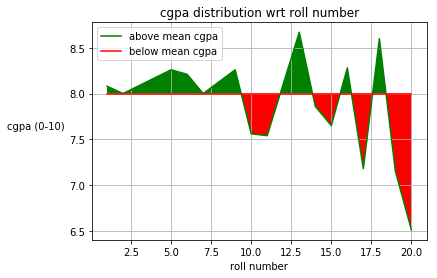

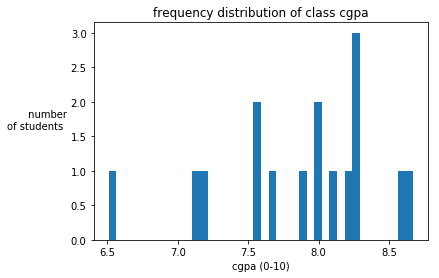

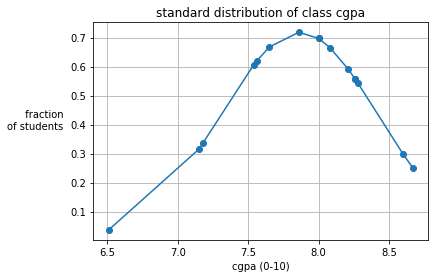

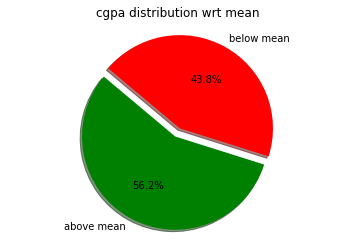

In [11]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

# for individual cgpa 

# print("Students with theri cgpa :\n")
# for element in roll_and_cgpa:
#     print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
#print(len(above_mean),len(below_mean))
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this class has very less deviation compared to other department batches.However, the average grades are lesser than other department batches. An overall performance improvement is required.


https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation